In [10]:
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#read the data file
data = pd.read_csv("diabetes (1).csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1]:
#Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
#understand the distribution and relationships between the variables.

In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
#Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
#variables into dummy variables if necessary.

In [4]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#here few misconception is there lke BMI can not be zero, BP can't be zero, glucose, insuline can't be zero so lets try to fix it
# now replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())



In [17]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [18]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
#Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [20]:
x=pd.DataFrame(data,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
#dependent features
y=data.Outcome

In [22]:
x,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
 0              6    148.0           72.0      35.000000   79.799479  33.6   
 1              1     85.0           66.0      29.000000   79.799479  26.6   
 2              8    183.0           64.0      20.536458   79.799479  23.3   
 3              1     89.0           66.0      23.000000   94.000000  28.1   
 4              0    137.0           40.0      35.000000  168.000000  43.1   
 ..           ...      ...            ...            ...         ...   ...   
 763           10    101.0           76.0      48.000000  180.000000  32.9   
 764            2    122.0           70.0      27.000000   79.799479  36.8   
 765            5    121.0           72.0      23.000000  112.000000  26.2   
 766            1    126.0           60.0      20.536458   79.799479  30.1   
 767            1     93.0           70.0      31.000000   79.799479  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                      

In [23]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [4]:
#Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
#cross-validation to optimize the hyperparameters and avoid overfitting.

In [32]:
from sklearn.tree import DecisionTreeRegressor
treeclassifier=DecisionTreeClassifier()

In [36]:
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred=treeclassifier.predict(x_test)

In [38]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [35]:
#Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
#precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [39]:
from sklearn.metrics import classification_report,accuracy_score

In [40]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))

0.6968503937007874
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       145
           1       0.69      0.54      0.61       109

    accuracy                           0.70       254
   macro avg       0.69      0.68      0.68       254
weighted avg       0.70      0.70      0.69       254



In [41]:
#Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
#variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
#trends.

In [45]:
treeclassifier=DecisionTreeClassifier(max_depth=2)
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[1] <= 154.5\ngini = 0.457\nsamples = 514\nvalue = [332, 182]'),
 Text(0.25, 0.5, 'x[7] <= 30.5\ngini = 0.382\nsamples = 432\nvalue = [321, 111]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.24\nsamples = 251\nvalue = [216, 35]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.487\nsamples = 181\nvalue = [105, 76]'),
 Text(0.75, 0.5, 'x[5] <= 28.7\ngini = 0.232\nsamples = 82\nvalue = [11, 71]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.157\nsamples = 70\nvalue = [6, 64]')]

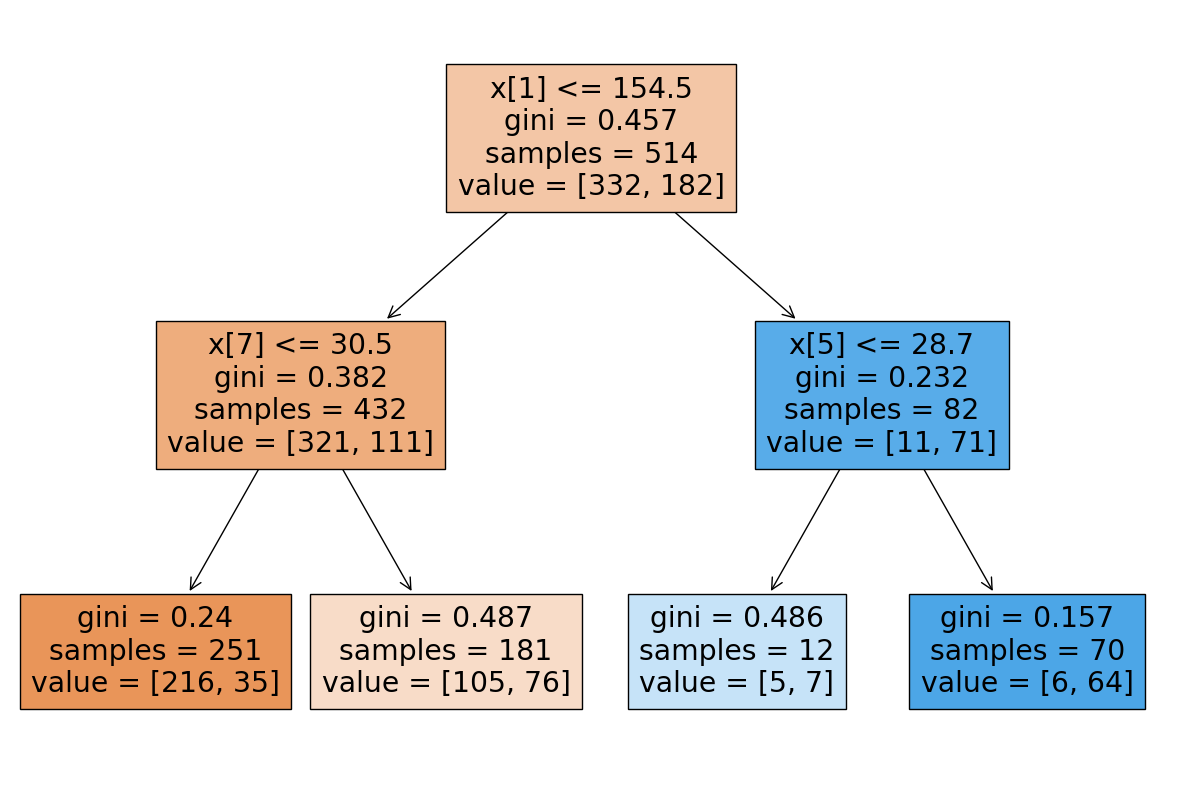

In [46]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treeclassifier,filled=True)

In [47]:
#Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
#dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
#risks.